In [4]:
import pandas as pd
import numpy as np
import torch
import sys

sys.path.insert(0, '../../../src/')
from utils.script_utils import create_parser, create_data_
sys.path.insert(0, '../../../scripts/')
from softmargin_run_new import add_arg_parser

In [5]:
seeds = np.arange(1,3).tolist()
num_conf = [50]*len(seeds)
num_conf = dict(zip(seeds, num_conf))

parser = create_parser()
add_arg_parser(parser)
args = parser.parse_args("")
args.type_graph="i_bird"

args.N = 95
args.d = 3
args.h = 3
args.t_limit = 12 # Numbers of epoch of our epidemics spreading [0,1,...,T_limit-1]
args.lambda_ = 0.5 # probability of infection
args.gamma = 1e-3 # probability of infection
args.mu = 0.02 # probability of recovery
args.small_lambda_limit=0
args.p_edge = 1
args.scale=2
args.a_min=0.001
args.a_max=0.3
args.a_step=0.02
args.path_contacts="work_13_contacts.npz"
nsims=[1_000_000, 10_000_000, 100_000_000]
nsims_str = ["1000000", "10000000"]
path_dir = "./data"
if path_dir == "not_setted":
    path_dir = type_graph

In [7]:
from epigen.epidemy_gen import epidemy_gen_new

list_contacts = {}
data_={}
INSTANCES = []
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}")
    
    args.seed=seed
    args.num_conf=num_conf[seed]
    #print(args)
    temp, name_file, INSTANCE = create_data_(args, give_instance=True)
    INSTANCES.append(INSTANCE)
    #Ns[cl] = int(max(temp["contacts"][:, 1]) + 1)
    list_contacts[seed] = temp["contacts"]
    data_[seed] = temp
N=args.N
data_.keys()


SEED: 1
number of contacts: 20856
Lim infected: 1, Lim max infected: 96
Num sources:  1
 # conf 24,mean infected: 43.2, mean recover: 2.6, max num infected: 66
num_infected 1 < 1 (lim_infected)
 # conf 50,mean infected: 47.7, mean recover: 3.4, max num infected: 78
1 (1.96%) epidemies refused

S:42, I:46, R:7
S:47, I:44, R:4
S:29, I:62, R:4
S:31, I:60, R:4
S:31, I:59, R:5
S:37, I:52, R:6
S:36, I:57, R:2
S:93, I:2, R:0
S:83, I:12, R:0
S:67, I:25, R:3
S:45, I:46, R:4
S:79, I:15, R:1
S:42, I:52, R:1
S:35, I:56, R:4
S:78, I:16, R:1
S:43, I:51, R:1
S:52, I:43, R:0
S:81, I:13, R:1
S:37, I:57, R:1
S:48, I:42, R:5
S:51, I:43, R:1
S:42, I:52, R:1
S:34, I:56, R:5
S:79, I:15, R:1
S:20, I:61, R:14
S:29, I:61, R:5
S:37, I:56, R:2
S:32, I:59, R:4
S:79, I:15, R:1
S:62, I:33, R:0
S:93, I:2, R:0
S:31, I:58, R:6
S:86, I:9, R:0
S:38, I:54, R:3
S:36, I:53, R:6
S:17, I:76, R:2
S:27, I:59, R:9
S:37, I:54, R:4
S:35, I:57, R:3
S:93, I:1, R:1
S:29, I:59, R:7
S:34, I:56, R:5
S:31, I:62, R:2
S:91, I:4, R:0
S:26

/Users/ocadni/git/ann_results/nnepi-results/results/patient_zero/work/../../../src/utils/script_utils.py:152: UserWarning: SAVING FOLDER DOES NOT EXIST
  warnings.warn("SAVING FOLDER DOES NOT EXIST")


dict_keys([1, 2])

# READ DATA

create name_files

In [18]:
name_files_nn = {}
Ns = [args.N]
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_nn[seed] = {}
    name_file_init = path_dir + "/ann_3lpow1/"
    #print(step, name_file_init)
    name_file_temp = name_file_init + str(INSTANCES[i_seed])
    #name_file_temp += f"_s_{seed}"
    name_files_nn[seed] = name_file_temp

name_files_sib = {}
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_sib[seed] = {}
    name_file_init = path_dir + "/sib/"
    #print(step, name_file_init)
    name_file_temp = name_file_init + f"N_{N}_d_{args.d}_h_{args.h}_T_{args.t_limit}_lam_{args.lambda_}_mu_{args.mu}_p_edge_{args.p_edge}"
    name_file_temp += f"_s_{seed}"
    name_files_sib[seed] = name_file_temp
            #print(name_file_temp)
        
name_files_sm = {}
for i_sim, nsim in enumerate(nsims):
    name_files_sm[nsim]={}
    for i_seed, seed in enumerate(seeds):
        #print(f"\nSEED: {seed}")
        name_files_sm[nsim][seed] = {}
        name_file = path_dir + "/sm/" +str(INSTANCES[i_seed])
        name_file += f"_nc_{num_conf[seed]}"
        name_file+= f"_softm_nsims_{nsim}_rep_{args.n_iter-1}"
        #print(name_file)
        name_files_sm[nsim][seed] = name_file


### READ FILES

In [19]:
#create dictorary containing data
ress = {}
for i_seed, seed in enumerate(seeds):
    #print(f"SEED: {seed}")
    ress[seed] = {}
    ress[seed] = []
    for instance_num in range(num_conf[seed]):
        #print(f" N: {N_cl} instance {instance_num}")
        ress[seed].append({})


In [20]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[seed]):
        ress[seed][instance_num]["regressive"] = {}
        #print(f"Read instance {instance_num}")
        name_temp = name_files_nn[seed] +"_" + str(instance_num)
        try:
            ress[seed][instance_num]["regressive"] = {}
            ress[seed][instance_num]["regressive"]["marginals"] = np.load(name_temp + "_margs.npz",
                                                                    "r+",
                                                                   allow_pickle=True,
                                                                   fix_imports=True)["marginals"]
        except:
            print(f"  instance_num: {instance_num} NOT FOUND {name_temp}")
        try:
            ress[seed][instance_num]["regressive"]["run"] = pd.read_csv(name_temp + ".gz")
            beta = ress[seed][instance_num]["regressive"]["run"]["beta"].iloc[-1]
            if beta < 1:
                print(f"***** beta {beta} {seed}")
            #print(f"  instance_num: {instance_num}")
        except:
            print("no gz")
        try:
            '''ress[seed][N_cl][instance_num]["regressive"]["net"] = torch.load(name_temp + ".pt",
                                                                  map_location=device)
            #ress[N_cl][instance_num]["regressive"]["net"].to(device)
            ress[seed][N_cl][instance_num]["regressive"]["net"].device = device
            for ll in ress[seed][N_cl][instance_num]["regressive"]["net"].sublayers:
                for l in ll:
                    l.device=device
            print(f"  NN net: {instance_num}")'''
            pass
        except:
            print(f"  NN net: {instance_num} NON FOUND")

 1no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
 2no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz
no gz


In [21]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[seed]):
        #print(f"Read instance {instance_num}")
        name_temp = name_files_sib[seed] +"_" + str(instance_num)
        ress[seed][instance_num]["sib"] = {}
        try:
            ress[seed][instance_num]["sib"]["marginals"] = np.load(name_temp + "_sib_margs.npz",
                                                                    "r+",
                                                                   allow_pickle=True,
                                                                   fix_imports=True)["marginals"]
            #print("load SIB")
        except:
            print(f"SIB not found")


 1 2

In [22]:
for i_seed, seed in enumerate(seeds):
    print(f" {seed}", end="")
    for instance_num in range(num_conf[seed]):
        ress[seed][instance_num]["sm"] = {}
        for nsim in nsims:
            ress[seed][instance_num]["sm"][nsim] = {}
            #print(f"Read instance {instance_num}, nsim: {nsim}")
            #for nsim in nsims:
            name_temp_sm = name_files_sm[nsim][seed]
            #try:
                    #ress[seed][N_cl][instance_num]["sm"][nsim] = {}
            '''ress[seed][N_cl][instance_num]["sm"][nsim]["marginals"] = np.load(name_temp_sm + "_margs.npz",
                                                                                "r+",
                                                                               allow_pickle=True,
                                                                               fix_imports=True)["margs_0"]'''
            ress[seed][instance_num]["sm"][nsim]["prob_zero"] = np.load(name_temp_sm + "_probs.npz",
                                                                            "r+",
                                                                           allow_pickle=True,
                                                                           fix_imports=True)["inst_" + str(instance_num)]
                #print(f"loaded SF nsim: {instance_num} ...")
            #except:
             #   print(f"not found SF nsim: {instance_num} {nsim}... ")

                    #ress[instance_num]["regressive"]["net"] = torch.load(name_temp + ".pt")                          name_temp = name_files_nn[seed][N_cl][step] +"_" + str(instance_num)


 1 2

# results

In [23]:
from utils.analysis import sort_I
from analysis.results_analysis import sources_finder, plot_patient_zero_roc

ModuleNotFoundError: No module named 'utils.analysis'

In [24]:
import analysis.results_analysis
import imp
imp.reload(analysis.results_analysis)
from analysis.results_analysis import sources_finder, plot_patient_zero_roc

In [25]:
marginals, pos_sources = sources_finder(ress, data_, num_conf, nsims)

In [26]:
import pickle
with open("pos_sources.pkl", "wb") as f:
    pickle.dump( pos_sources, f )

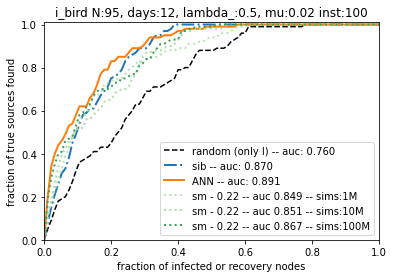

In [27]:
import matplotlib.pyplot as plt
bins=N
plot_patient_zero_roc(plt,
                          pos_sources, 
                          nsims, 
                      args,
                          alpha=11, 
                          bins=bins,
                          range_=(0,1),
                          norm=N,
                          colors=plt.get_cmap("Greens"))
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{100}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)
plt.show()

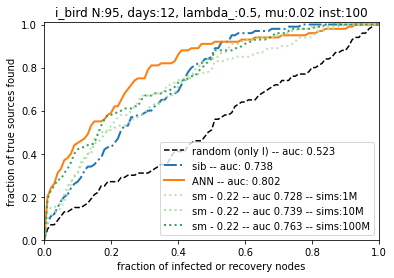

In [28]:
import matplotlib.pyplot as plt
bins=100
plot_patient_zero_roc(plt,
                          pos_sources, 
                          nsims, 
                          args,
                          alpha=11, 
                          bins=bins,
                          range_=(0,1),
                          norm=pos_sources["Is_len"],
                          colors=plt.get_cmap("Greens"))
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{100}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)
plt.show()

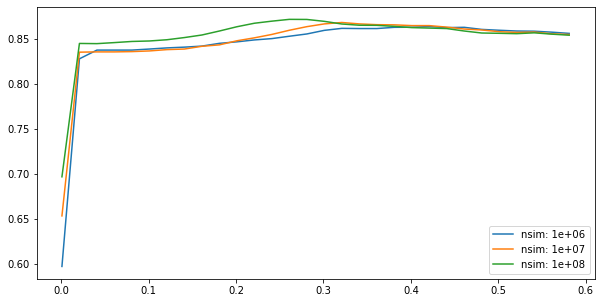

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
norm=N
bins=N
range_=(0,1)
for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(pos_sources["sm"][0][nsim])):
        pos_source_sm=np.array([pos_sources["sm"][ii][nsim][alpha] for ii in range(len(pos_sources["sm"]))])
        s_sm,x = np.histogram(pos_source_sm/norm, bins=bins, range=range_)
        y_sm = np.insert(np.cumsum(s_sm)/len(pos_sources["sm"]),0,0)        
        #print(alpha, np.cumsum(s_sm))
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)

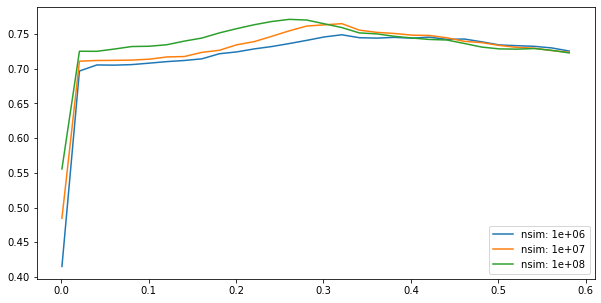

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
norm=pos_sources["Is_len"]
bins=100
range_=(0,1)
for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(pos_sources["sm"][0][nsim])):
        pos_source_sm=np.array([pos_sources["sm"][ii][nsim][alpha] for ii in range(len(pos_sources["sm"]))])
        s_sm,x = np.histogram(pos_source_sm/norm, bins=bins, range=range_)
        y_sm = np.insert(np.cumsum(s_sm)/len(pos_sources["sm"]),0,0)        
        #print(alpha, np.cumsum(s_sm))
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)

In [31]:
pos_sources["regressive"]

array([33,  1,  8, 12, 45, 12, 15,  1,  0,  1, 39,  0,  7, 15,  4,  2, 36,
        0,  2,  0, 18,  1,  9,  1, 14, 20, 23, 29,  0, 13,  0,  0,  2,  0,
       16, 18,  9,  6, 18,  0,  1, 15,  9,  0, 28, 24, 12, 23,  1, 15, 14,
        3,  0,  2, 24, 54,  0, 20,  0,  1, 37,  2,  1,  3,  0,  1, 15,  8,
        2, 14, 18,  6,  0,  3, 12,  3,  6,  1,  0,  6,  0, 16,  1, 28,  0,
        0,  1, 14, 13,  1,  4,  5,  0,  8,  9,  5,  8, 29, 27,  5])

In [32]:
count=0
for i in seeds:
    for instance in range(len(data_[i]["epidemy"])):
        I = (data_[i]["epidemy"][instance][0][0] < np.inf).sum()
        steps = ress[i][instance]["regressive"]["run"]["step"].iloc[-1]
        print(i, pos_sources["regressive"][count], pos_sources["sib"][count], I, steps)
        count += 1

KeyError: 'run'